<a href="https://colab.research.google.com/github/rhsh-team/perfect/blob/main/ayabaaaaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
# # Load the necessary packages
import pandas as pd
import numpy as np


In [213]:
mydata = pd.read_csv('/content/drive/MyDrive/House Price Prediction Dataset.csv')

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
mydata.tail(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [216]:

print("number of rows akata:", len(mydata))

number of rows akata: 2000


In [217]:
mydata.head()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [218]:
mydata.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [219]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [220]:
mydata.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [221]:
Q1 = mydata["Area"].quantile(0.25)  # 25th percentile
Q3 = mydata["Area"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1
print("Interquartile Range (IQR) of area:", IQR)

Interquartile Range (IQR) of area: 2234.5


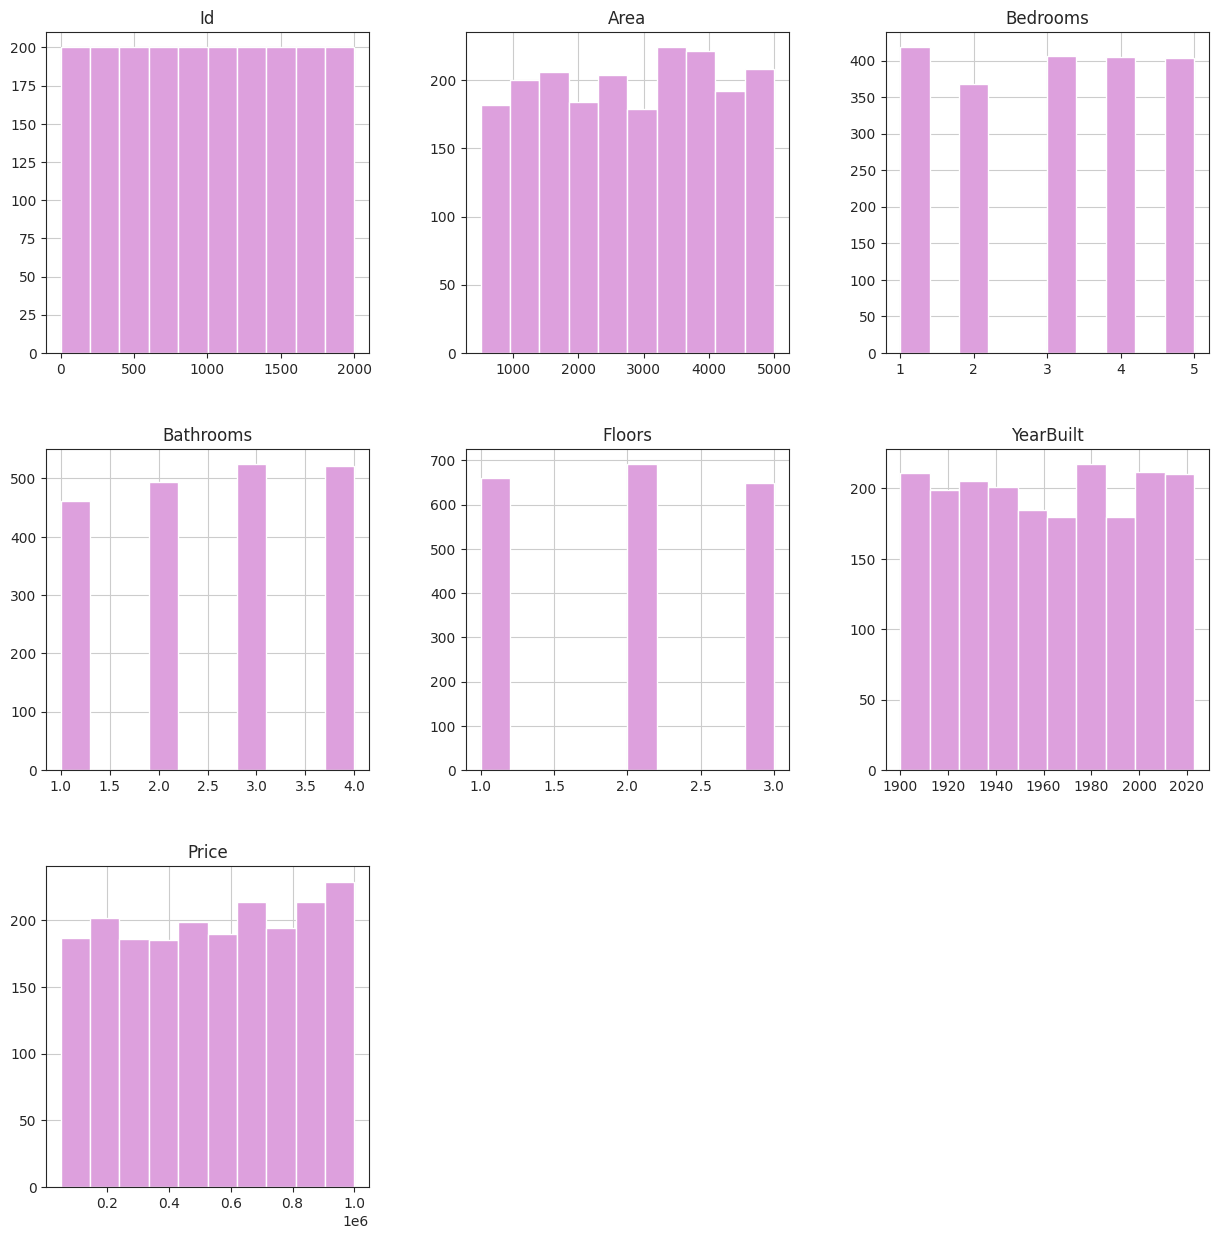

In [312]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(15,15),color='plum')
plt.show()


<Axes: xlabel='Floors', ylabel='Price'>

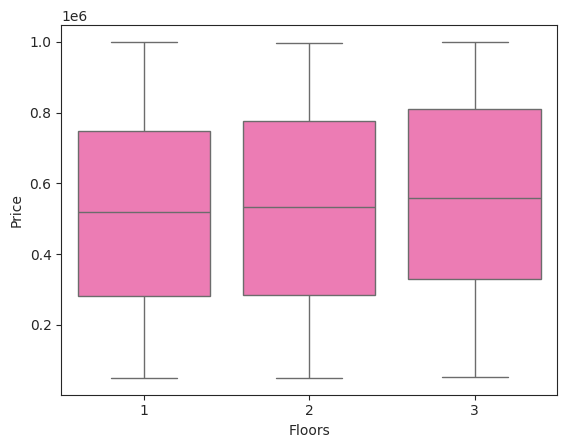

In [223]:
import seaborn as sns

sns.boxplot(x="Floors", y="Price", data=mydata,color='hotpink')

In [224]:
pd.crosstab(mydata['Bedrooms'],mydata['Area'] )

Area,501,502,503,504,505,509,510,511,513,516,...,4985,4988,4991,4992,4993,4994,4995,4996,4997,4999
Bedrooms,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,0,...,1,0,2,0,0,2,0,1,0,0
2,0,1,0,0,0,1,0,1,0,2,...,1,1,0,0,0,0,1,1,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
5,0,0,0,1,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [225]:
pd.crosstab(mydata['Floors'],mydata['YearBuilt'] )

YearBuilt,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Floors,,,,,,,,,,,,,,,,,,,,,
1,3,9,6,2,3,5,9,4,10,10,...,6,7,0,7,4,6,5,3,6,8
2,4,10,6,5,6,6,2,4,3,2,...,11,6,3,6,8,5,5,3,7,3
3,5,6,2,5,6,5,3,7,6,2,...,4,5,3,8,2,5,6,6,5,1


<Axes: xlabel='Bedrooms', ylabel='count'>

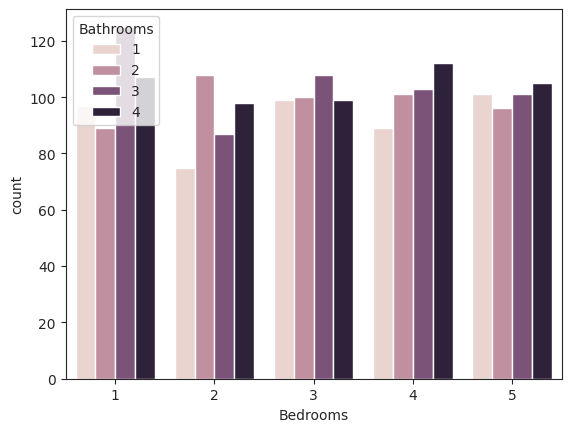

In [226]:
sns.countplot(x="Bedrooms", hue="Bathrooms", data=mydata)

In [227]:
pd.pivot_table(mydata, index=['Area', 'Bedrooms'],
                     columns=[ 'Floors'], aggfunc=len)
##pivot table will show the count of houses for each combination of Area, Bedrooms, and Floors.

Bathrooms           Condition           Garage             Id  \
Floors                1    2    3         1    2    3      1    2    3    1   
Area Bedrooms                                                                 
501  1              1.0  NaN  NaN       1.0  NaN  NaN    1.0  NaN  NaN  1.0   
     4              NaN  NaN  1.0       NaN  NaN  1.0    NaN  NaN  1.0  NaN   
502  2              1.0  NaN  NaN       1.0  NaN  NaN    1.0  NaN  NaN  1.0   
503  1              NaN  NaN  1.0       NaN  NaN  1.0    NaN  NaN  1.0  NaN   
504  5              1.0  NaN  NaN       1.0  NaN  NaN    1.0  NaN  NaN  1.0   
...                 ...  ...  ...       ...  ...  ...    ...  ...  ...  ...   
4995 2              NaN  NaN  1.0       NaN  NaN  1.0    NaN  NaN  1.0  NaN   
4996 1              1.0  NaN  NaN       1.0  NaN  NaN    1.0  NaN  NaN  1.0   
     2              NaN  NaN  1.0       NaN  NaN  1.0    NaN  NaN  1.0  NaN   
4997 2              NaN  1.0  NaN       NaN  1.0  NaN    NaN  1.0  NaN  NaN   
4999 4              1.0  NaN  NaN       1.0  NaN  NaN    1.0  NaN  NaN  1.0   

               ...      Location           Price           YearBuilt            
Floors         ...    3        1    2    3     1    2    3         1    2    3  
Area Bedrooms  ...                                                              
501  1         ...  NaN      1.0  NaN  NaN   1.0  NaN  NaN       1.0  NaN  NaN  
     4         ...  1.0      NaN  NaN  1.0   NaN  NaN  1.0       NaN  NaN  1.0  
502  2         ...  NaN      1.0  NaN  NaN   1.0  NaN  NaN       1.0  NaN  NaN  
503  1         ...  1.0      NaN  NaN  1.0   NaN  NaN  1.0       NaN  NaN  1.0  
504  5         ...  NaN      1.0  NaN  NaN   1.0  NaN  NaN       1.0  NaN  NaN  
...            ...  ...      ...  ...  ...   ...  ...  ...       ...  ...  ...  
4995 2         ...  1.0      NaN  NaN  1.0   NaN  NaN  1.0       NaN  NaN  1.0  
4996 1         ...  NaN      1.0  NaN  NaN   1.0  NaN  NaN       1.0  NaN  NaN  
     2         ...  1.0      NaN  NaN  1.0   NaN  NaN  1.0       NaN  NaN  1.0  
4997 2         ...  NaN      NaN  1.0  NaN   NaN  1.0  NaN       NaN  1.0  NaN  
4999 4         ...  NaN      1.0  NaN  NaN   1.0  NaN  NaN       1.0  NaN  NaN  

[1906 rows x 21 columns]

It shows the average year houses were built, grouped by Area and Bedrooms, separated by number of Floors.


In [228]:
pd.pivot_table(mydata,'YearBuilt',index=['Area', 'Bedrooms'],
                     columns=[ 'Floors'])

Floors              1       2       3
Area Bedrooms                        
501  1         1955.0     NaN     NaN
     4            NaN     NaN  1905.0
502  2         1909.0     NaN     NaN
503  1            NaN     NaN  2012.0
504  5         1925.0     NaN     NaN
...               ...     ...     ...
4995 2            NaN     NaN  1925.0
4996 1         2005.0     NaN     NaN
     2            NaN     NaN  1943.0
4997 2            NaN  1918.0     NaN
4999 4         1967.0     NaN     NaN

[1906 rows x 3 columns]

calculate the standard deviation of the Area

In [229]:
mydata['Area'].std()

1295.1467987162173

calculate the mean of the Area

In [230]:
mydata['Area'].mean()

np.float64(2786.2095)

Displays a histogram of the 'Area' column using Seaborn

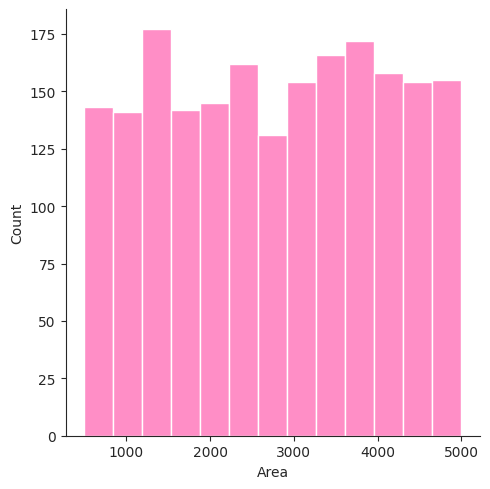

In [231]:
sns.displot(mydata['Area'],color='hotpink')

Plots separate histograms of 'Bedrooms' for each unique 'Floors' value.

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: >]], dtype=object)

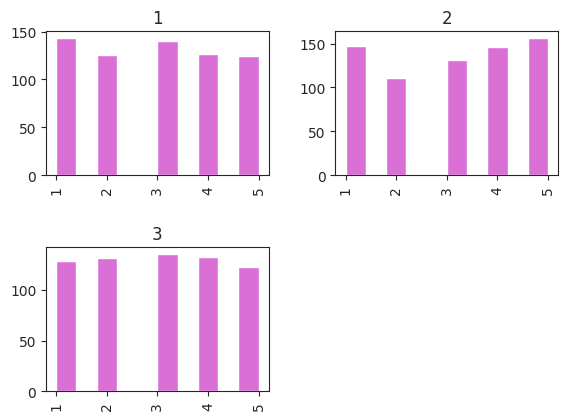

In [232]:
mydata.hist(by='Floors',column = 'Bedrooms',color='orchid')


array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: >]], dtype=object)

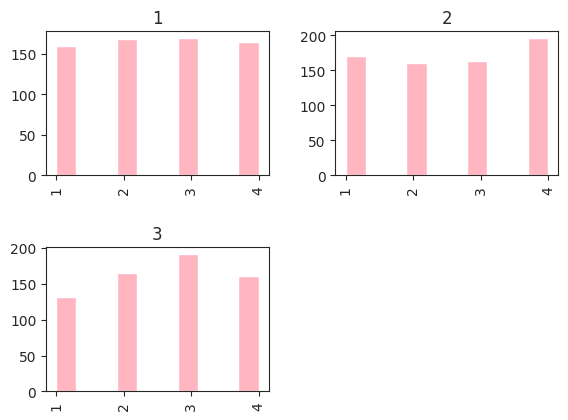

In [233]:
mydata.hist(by='Floors',column = 'Bathrooms',color='lightpink')

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: >]], dtype=object)

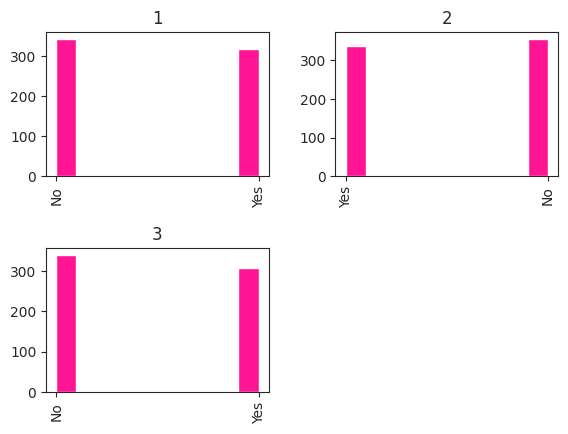

In [234]:
mydata.hist(by='Floors',column = 'Garage',color='deeppink')

Plots separate histograms of 'Location' for each 'Floors' value, with figure size 30×30.

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: >]], dtype=object)

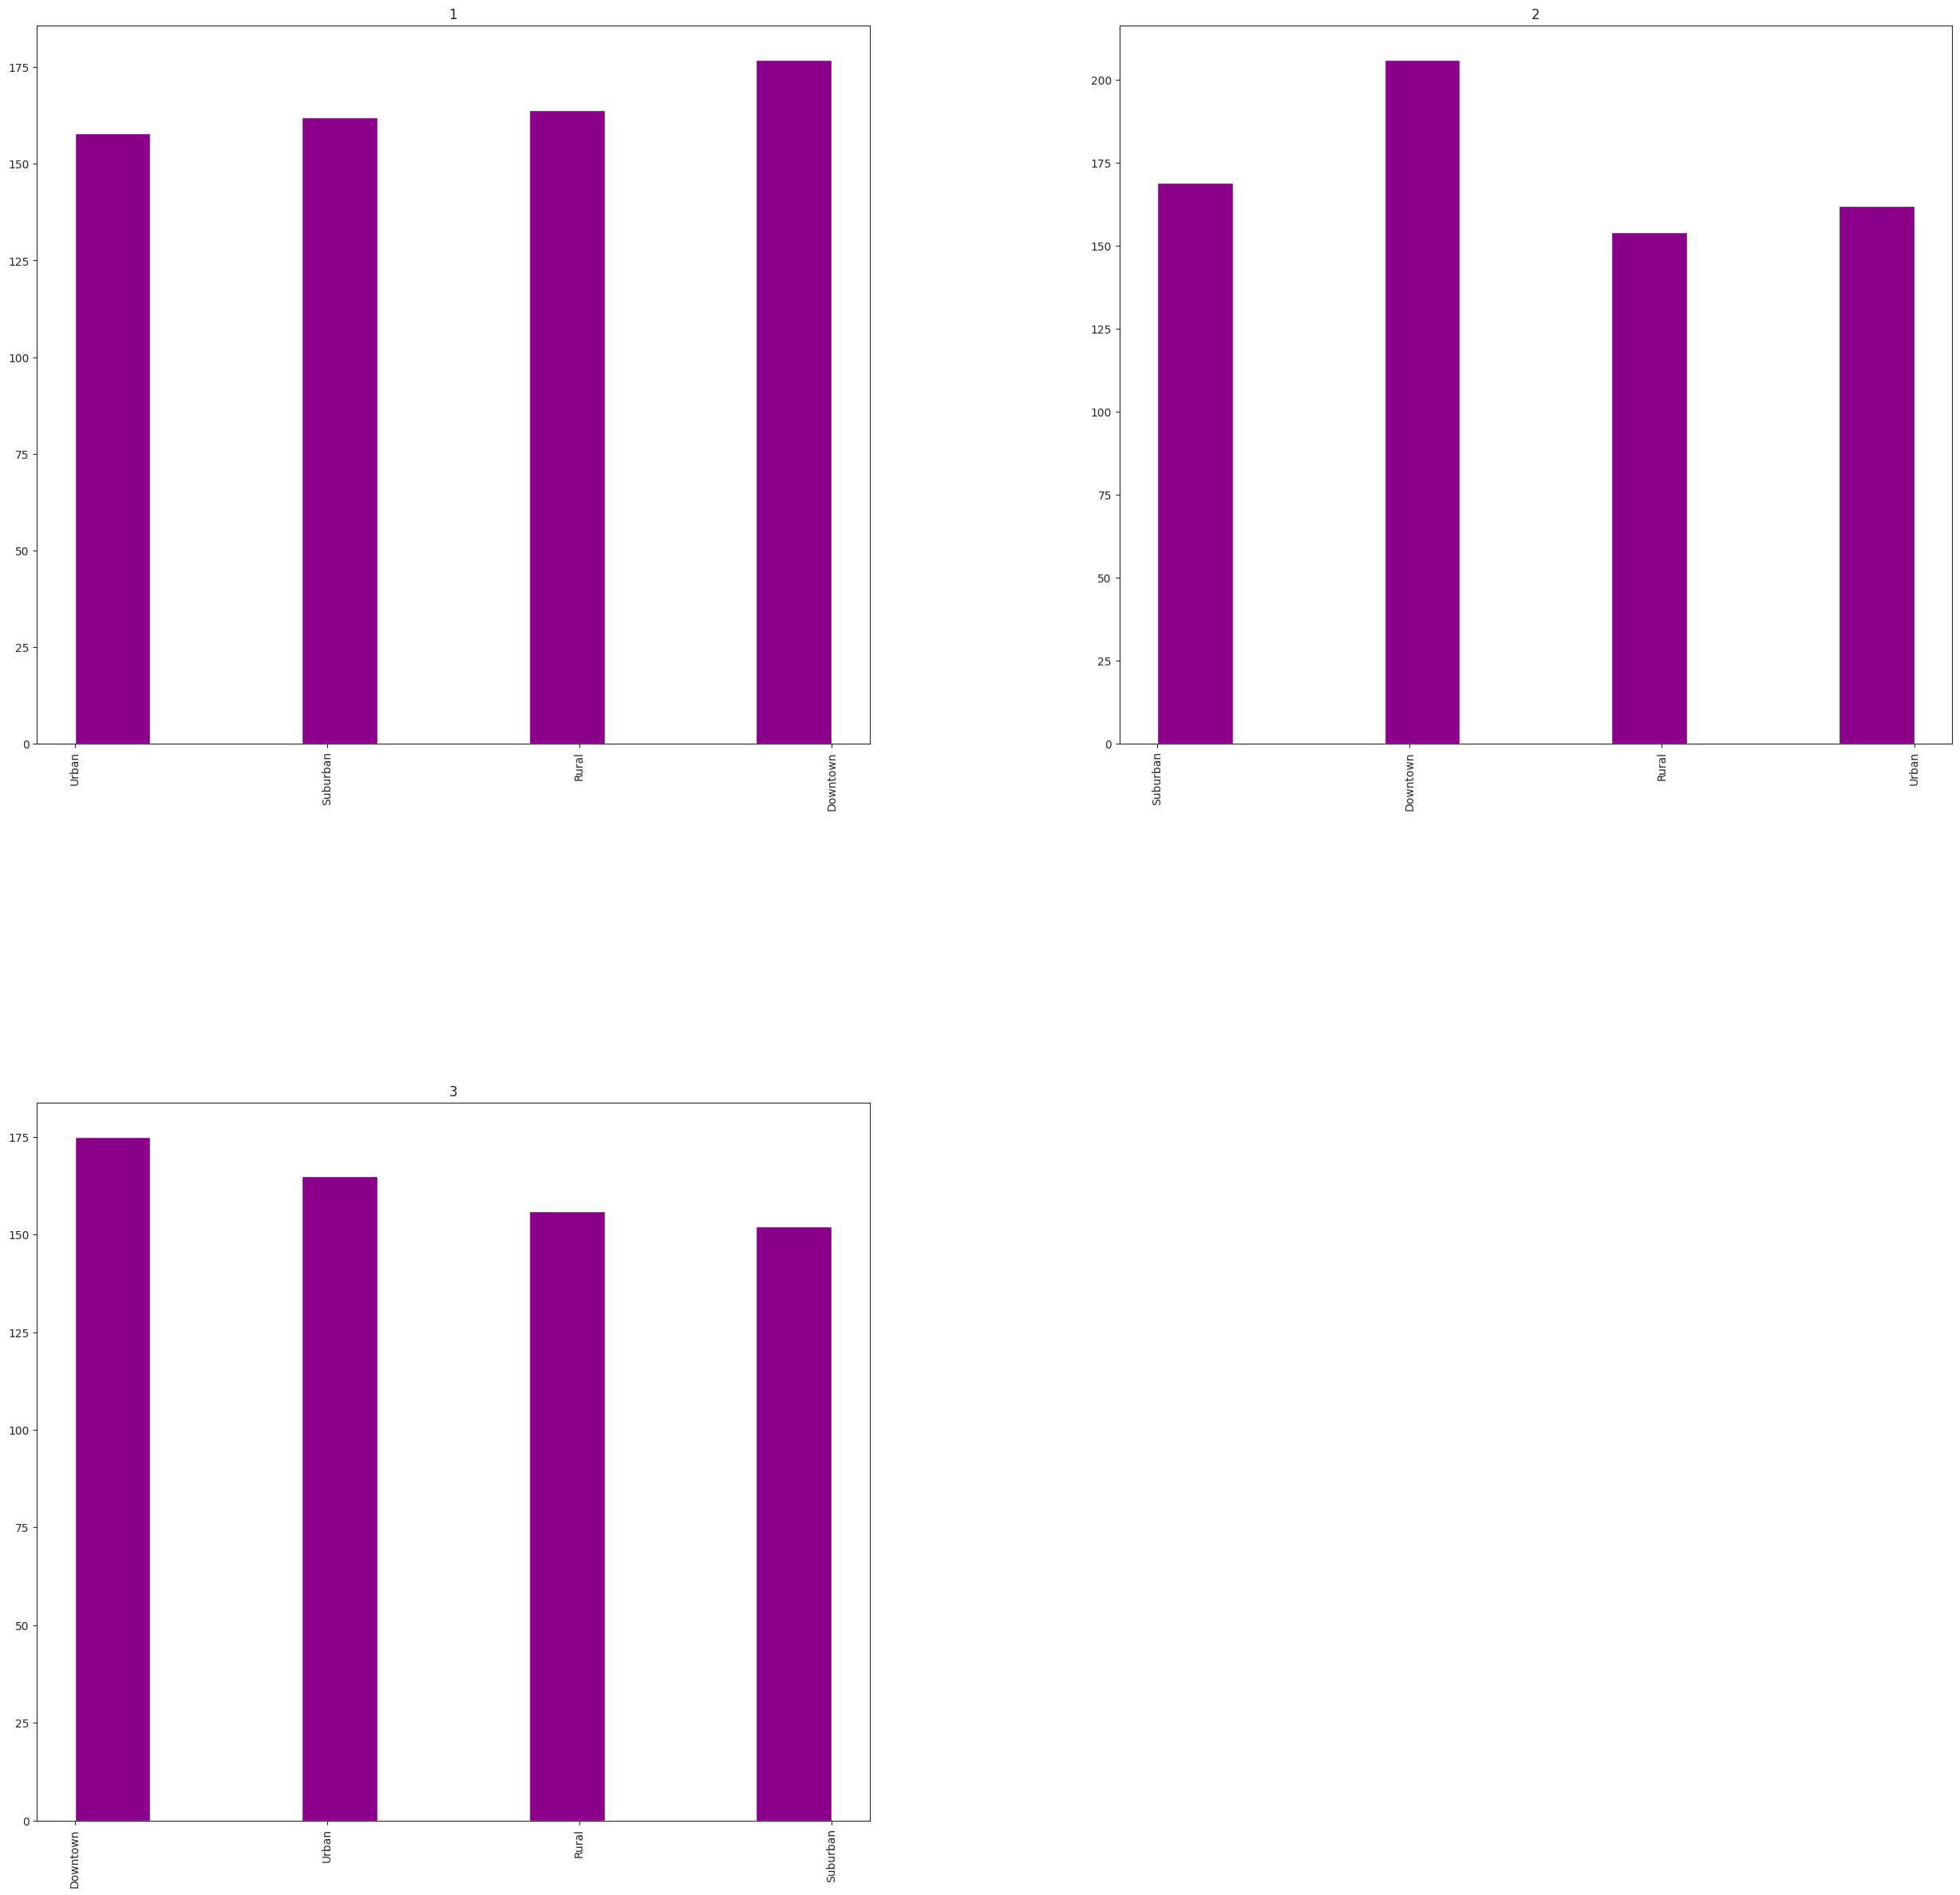

In [235]:
mydata.hist(by='Floors',column = 'Location', figsize=(30,30),color='darkmagenta')

Creates scatter plots between all numeric column pairs and histograms on the diagonal.

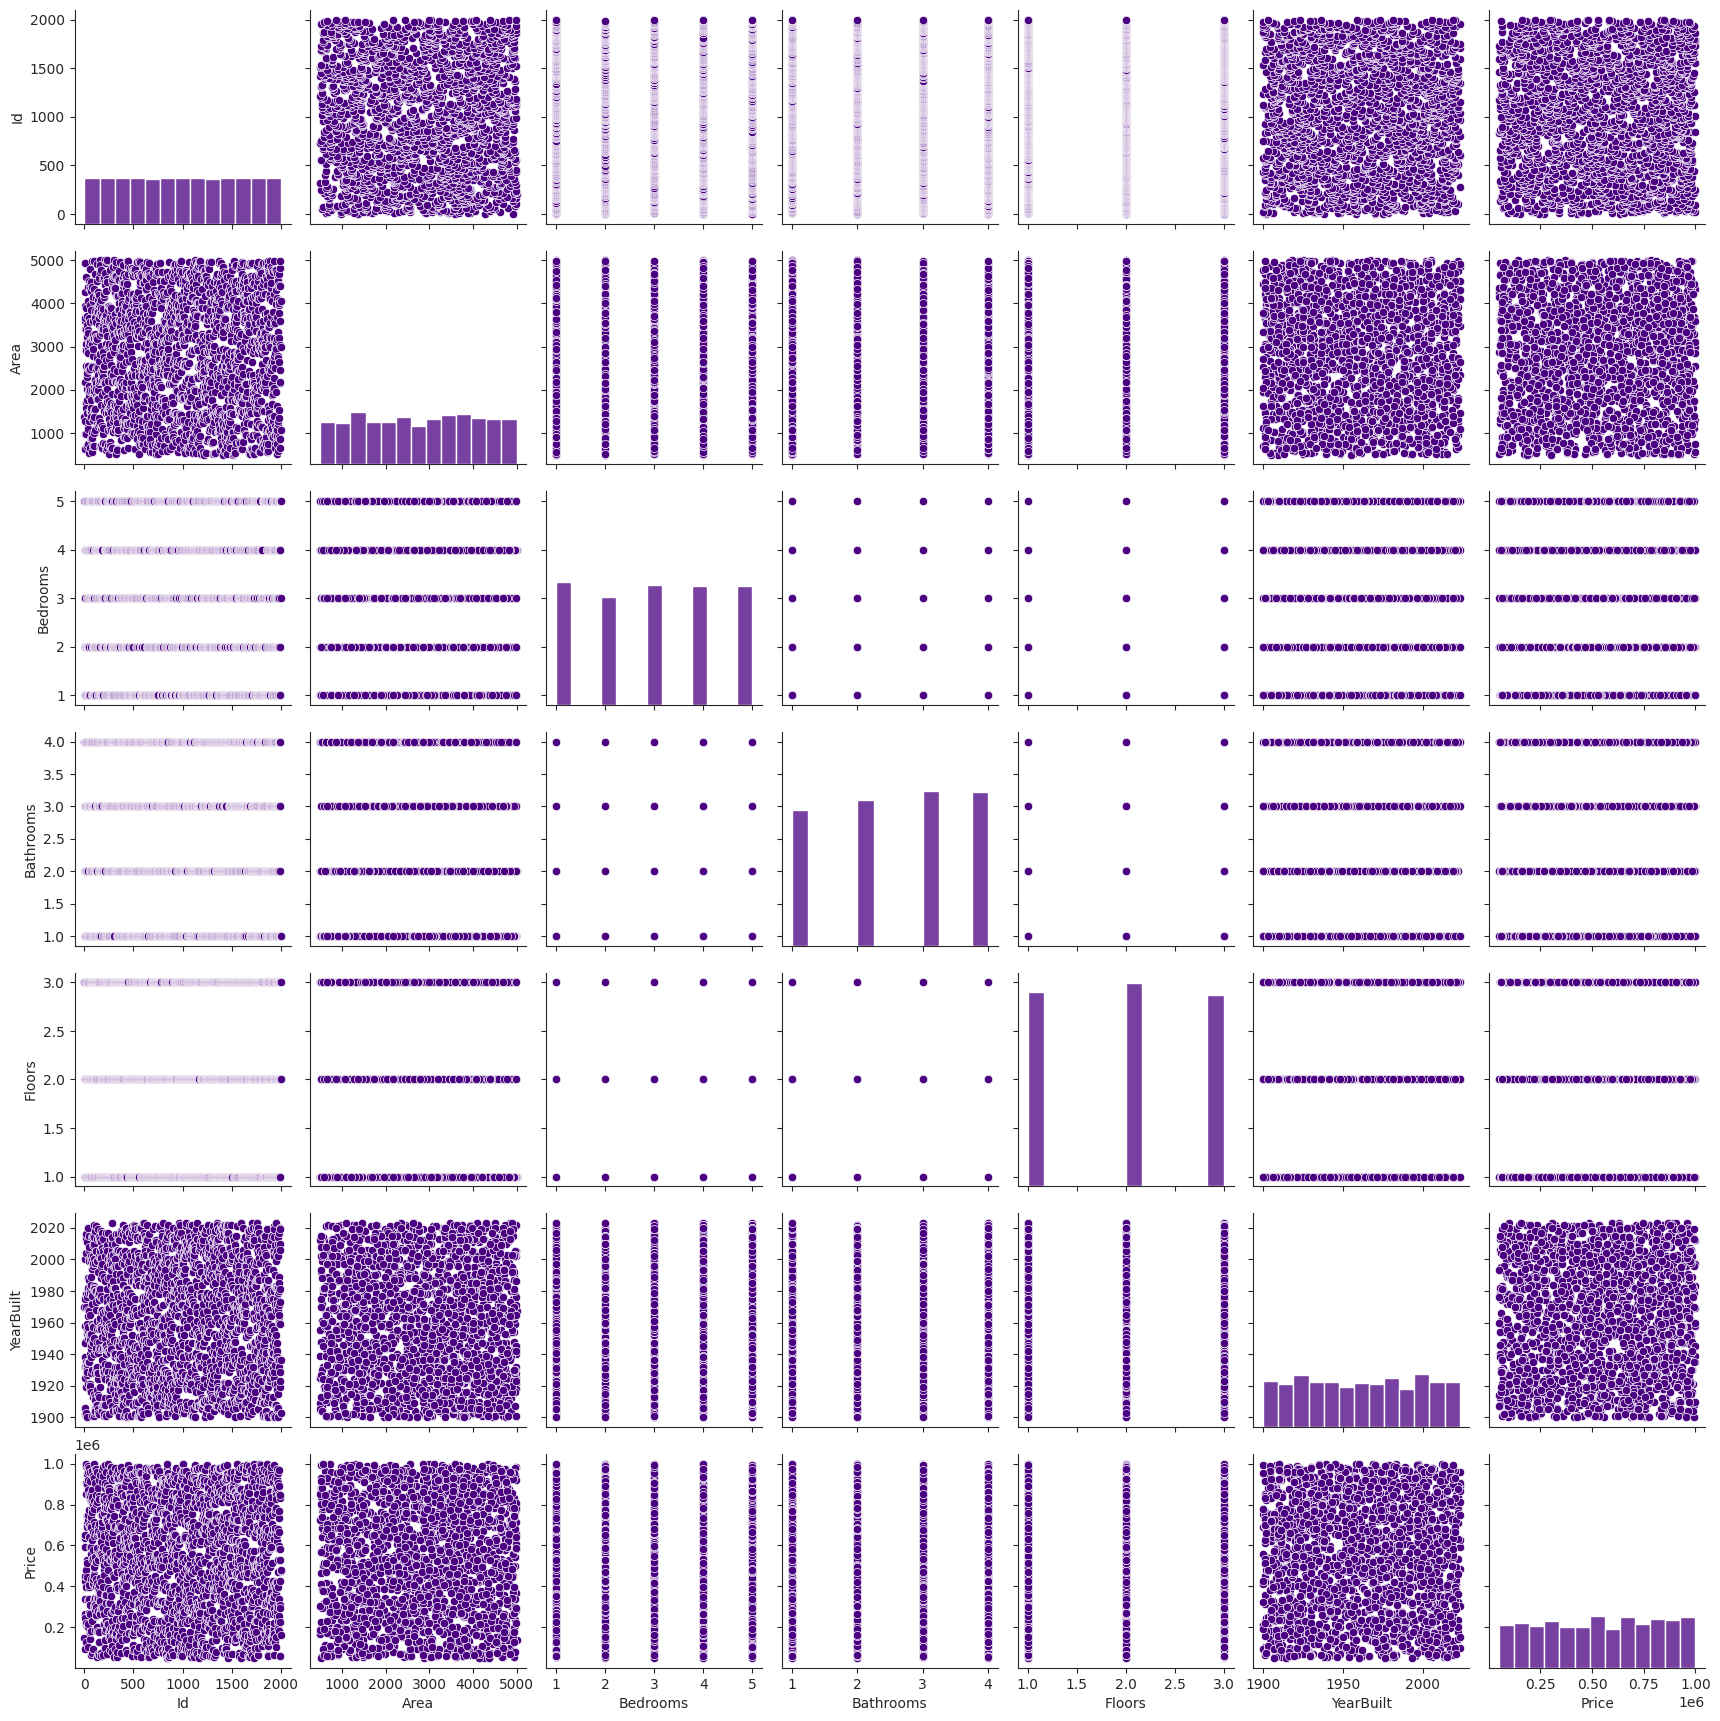

In [236]:
sns.pairplot(mydata,
             plot_kws={'color': 'indigo'},
             diag_kws={'color': 'indigo'})

plt.show()

NumPy (np): Array operations and math functions.

SciPy stats (st): Statistical functions.

Matplotlib (plt): Plotting graphs.

Seaborn (sns): Statistical data visualization.

In [237]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### Measures of Central Tendency



Measures of central tendency provide a summary statistic on the center of a given distribution, the "average" value of the distribution.


Sets the seed for random number generation to 42,

In [238]:
np.random.seed(42)

Generates 1,000 random values from a skewed normal distribution with a skewness shape parameter of 10.

In [239]:
x = st.skewnorm.rvs(10, size=1000)
#n<1 left destribution n>1 right destribution 1 normal

These are the first 20 samples from a right-skewed normal distribution (skewness = 10), generated reproducibly using np.random.seed(42).

In [240]:
x[0:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

This code creates a histogram plot using the `x` data, with the color of the bars set to violet.


Text(0, 0.5, 'number of houses')

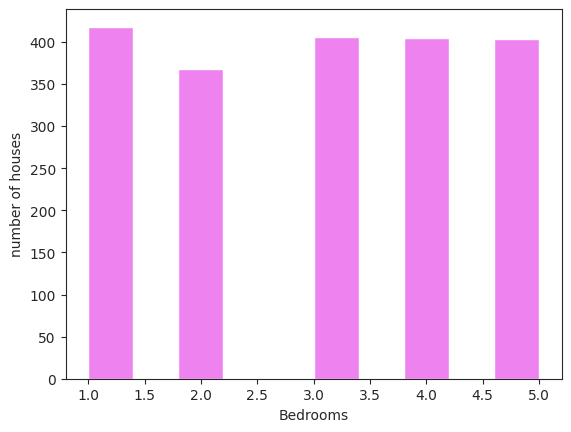

In [241]:
fig, ax = plt.subplots()
_ = plt.hist(mydata['Bedrooms'], color = 'violet')
ax.set_xlabel('Bedrooms')
ax.set_ylabel('number of houses')

#### Mean


The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):


This code calculates and returns the mean (average) value of the data in `x`.


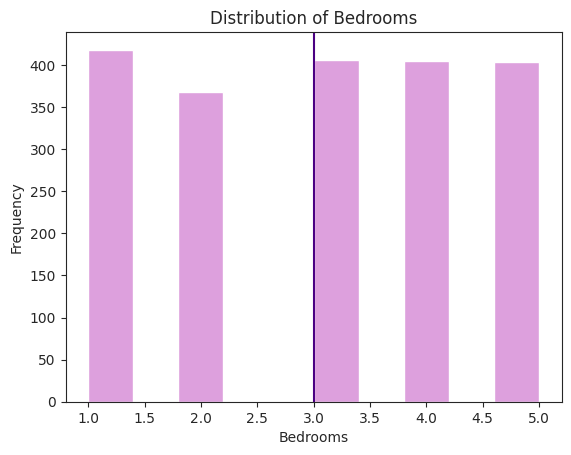

In [242]:
fig, ax = plt.subplots()
_ = ax.hist(mydata['Bedrooms'], color = 'Plum') # Plot histogram of 'Bedrooms' data

# Add a vertical line for the mean of 'Bedrooms'
mean_bedrooms = np.mean(mydata['Bedrooms'])
ax.axvline(mean_bedrooms, color='indigo')

ax.set_xlabel('Bedrooms')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Bedrooms') # Add a title for clarity


plt.show()

#### Median


The second most common measure of central tendency is the **median**, the midpoint value in the distribution:


In [243]:
np.median(mydata['Bedrooms'])

np.float64(3.0)

The **mode** is least impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:


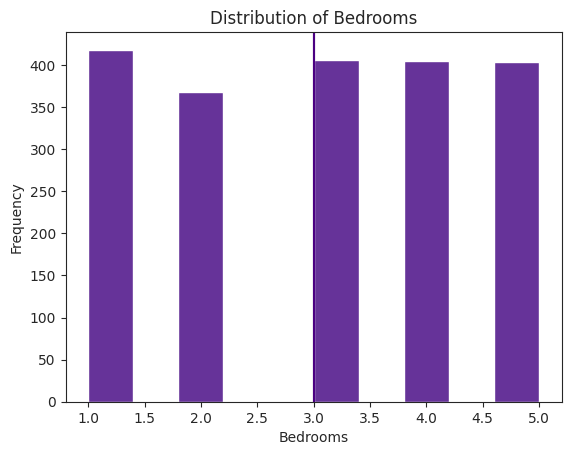

In [244]:
fig, ax = plt.subplots()
_ = ax.hist(mydata['Bedrooms'], color = 'rebeccapurple')


ax.axvline(mean_bedrooms, color='indigo')

ax.axvline( np.median(mydata['Bedrooms']), color='indigo')
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Bedrooms')
plt.show()

### Measures of Dispersion


#### Variance


$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$


In [245]:
np.var(mydata['Bedrooms'])

2.0284877500000196

In [246]:
mydata['Bedrooms'].var()

2.029502501250645

#### Standard Deviation


A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:


In [247]:
np.var(mydata['Bedrooms'])**(1/2)

1.4242498902931393

In [248]:
sigma = np.var(mydata['Floors'])**(1/2)
sigma

0.8089856302802827

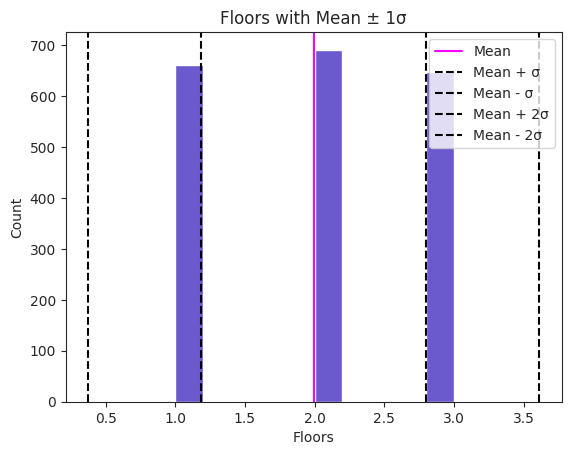

In [249]:


x = mydata['Floors']      # Get 'Floors' data and drop missing values
sigma = np.std(x, ddof=1)           # sample standard deviation
mean = np.mean(x)                   # Mean

plt.hist(x, color='slateblue')
plt.axvline(mean, color='magenta', label='Mean')
plt.axvline(mean + sigma, color='black', linestyle='--', label='Mean + σ')
plt.axvline(mean - sigma, color='black', linestyle='--', label='Mean - σ')
plt.axvline(mean + sigma+ sigma, color='black', linestyle='--', label='Mean + 2σ')
plt.axvline(mean - sigma- sigma, color='black', linestyle='--', label='Mean - 2σ')

plt.legend()
plt.title('Floors with Mean ± 1σ')
plt.xlabel('Floors')
plt.ylabel('Count')
plt.show()
##Calculates the **population standard deviation (σ)**. `ddof=0` means you divide by *n*, not *n-1* (which would be sample std deviation).


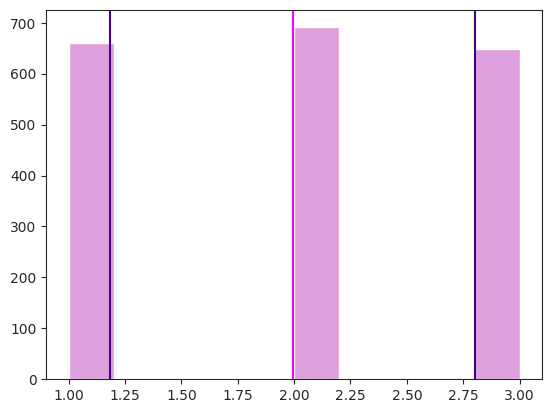

In [250]:
fig, ax = plt.subplots()
plt.axvline(mean, color='magenta')
plt.axvline(mean+sigma, color='indigo')
plt.axvline(mean-sigma, color='indigo')
_ = plt.hist(x, color = 'plum')

#### Standard Error


A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:


In [251]:
sigma/(x.size)**(1/2)

0.01809399268502217

In [252]:
st.sem(x)

np.float64(0.01809399268502236)

In [253]:
st.sem(x, ddof=0)
st.sem(x, ddof=0)
##Setting ddof=0 uses the population standard deviation

np.float64(0.01808946862127243)

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.


### Gaussian Distribution


After Carl Friedrich Gauss. Also known as **normal distribution**:


In [254]:
x = np.random.normal(size=10000)

In [255]:
sns.set_style('ticks')

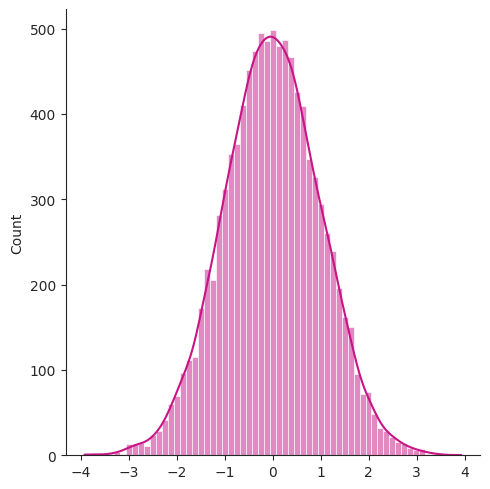

In [256]:
_ = sns.displot(x, kde=True, color='mediumvioletred')

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...


In [257]:
x.mean()

np.float64(-0.01626305454909193)

In [258]:
x.std()
x.std()


np.float64(1.0039756140435032)

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).


Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:
1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

### The Central Limit Theorem


To develop a functional understanding of the CLT, let's sample some values from our normal distribution:


In [259]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.10069587,  1.35557294,  0.66536894, -3.17042574,  0.43948605,
        0.53629091, -1.04552949, -0.99434937, -0.74023225, -0.54129909])

The mean of a sample isn't always going to be close to zero with such a small sample:


In [260]:
x_sample.mean()

np.float64(-0.35958129882198664)

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:


In [261]:
x = mydata['Floors']  # Make sure it's a NumPy array



In [262]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

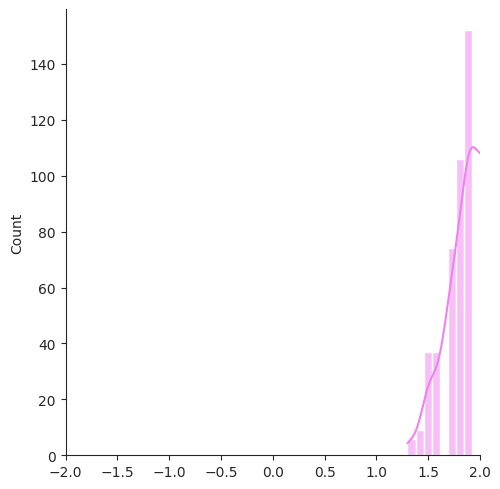

In [263]:
sns.displot(sample_mean_calculator(x, 10, 1000),  color='violet', kde=True)
_ = plt.xlim(-2, 2)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed:



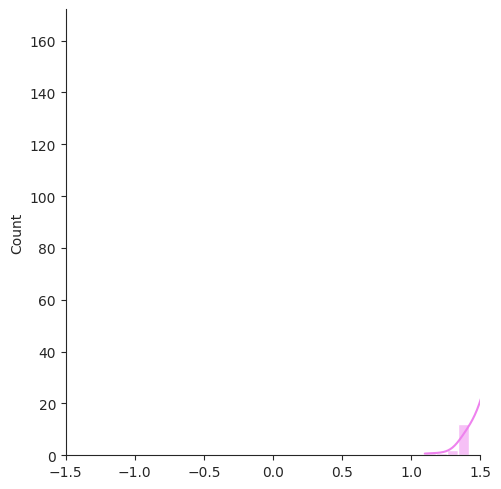

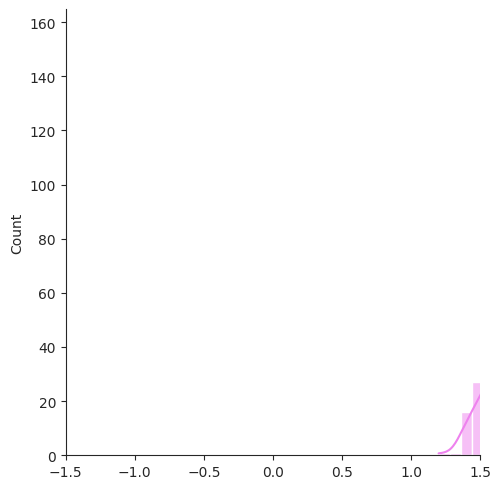

In [264]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='violet', kde=True)
_ = plt.xlim(-1.5, 1.5)
sns.displot(sample_mean_calculator(x, 10, 1000), color='violet', kde=True)
_ = plt.xlim(-1.5, 1.5)

In [265]:
s = st.skewnorm.rvs(10, size=10000)

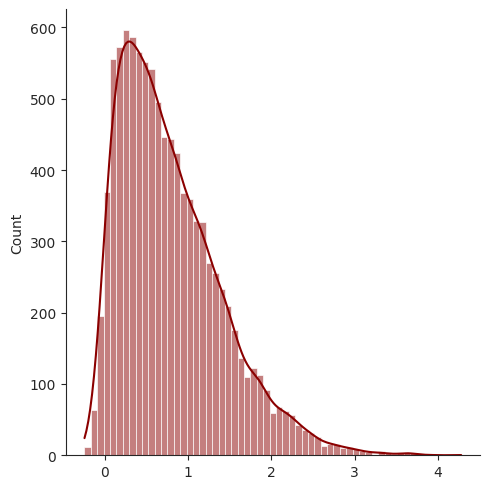

In [266]:
_ = sns.displot(s, kde=True, color='darkred')

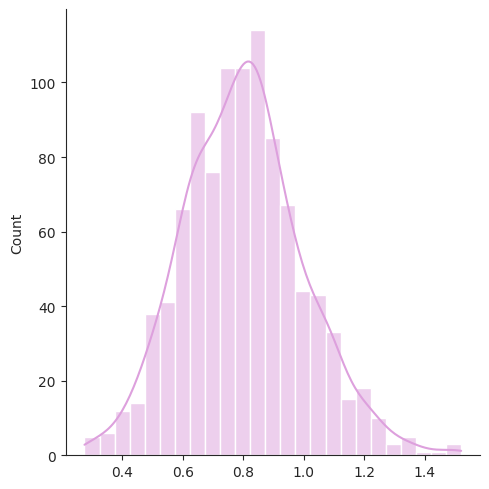

In [267]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='plum', kde=True)

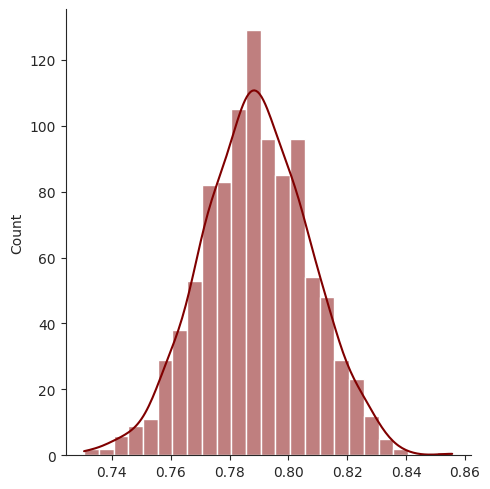

In [268]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='maroon', kde=True)

In [269]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

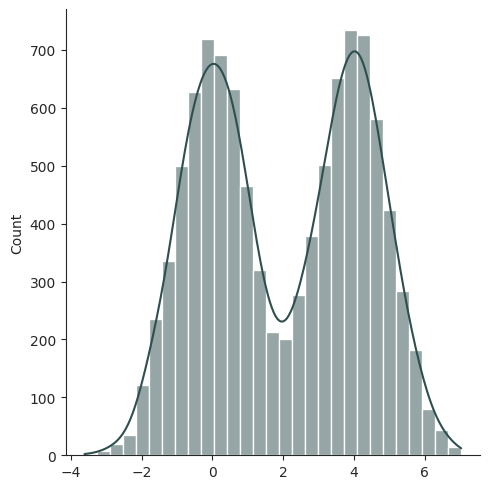

In [270]:
_ = sns.displot(m, kde=True, color='darkslategray')

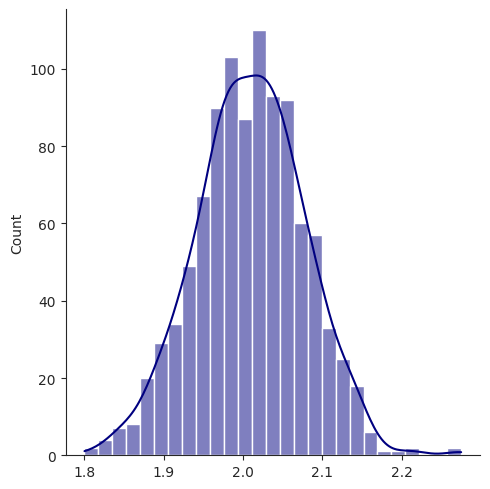

In [271]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='navy', kde=True)

In [272]:
u = np.random.uniform(size=10000)

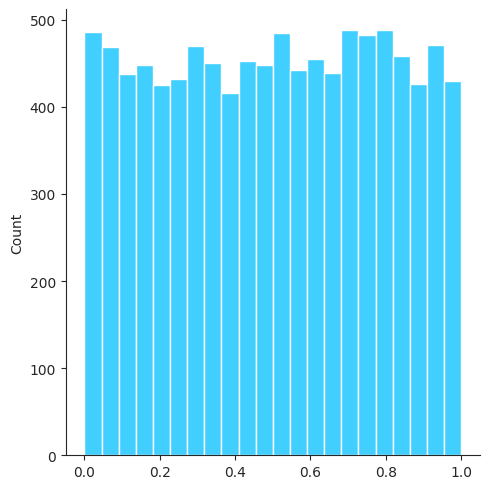

In [273]:
_ = sns.displot(u, color='deepskyblue')

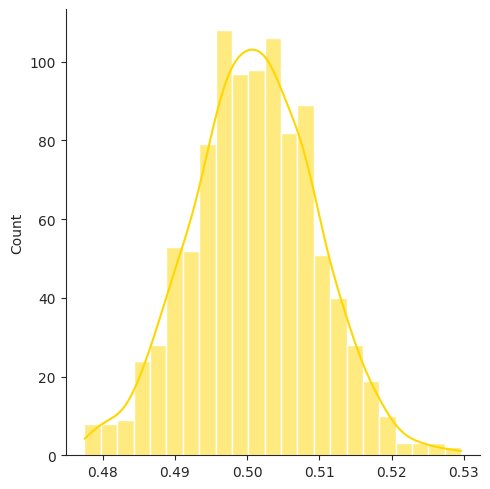

In [274]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='gold', kde=True)

In [275]:
x_i = 85
mu = 60
sigma = 10

In [276]:
x = np.random.normal(mu, sigma, 10000)
#Generates 10,000 random numbers that follow a normal distribution (bell-shaped curve)

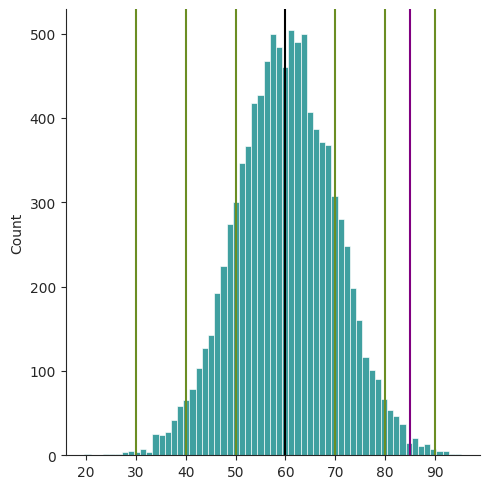

In [277]:
sns.displot(x, color='teal')
ax.set_xlim(0, 100)
plt.axvline(mu, color='black')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [278]:
z = (x_i - mu)/sigma
z

2.5

In [279]:
z = (x_i - np.mean(x))/np.std(x)
z

np.float64(2.5036817150902024)

In [310]:
len(np.where(x > 85)[0])
##Counts how many values in the array x are greater than 85.

64

In [281]:
100*69/10000

0.69

In [282]:
np.percentile(x, 99)  #Returns the value below which 99% of the data in array x falls.

np.float64(83.22907153320666)

In [283]:
mu = 90
sigma = 2

In [284]:
y = np.random.normal(mu, sigma, 10000)

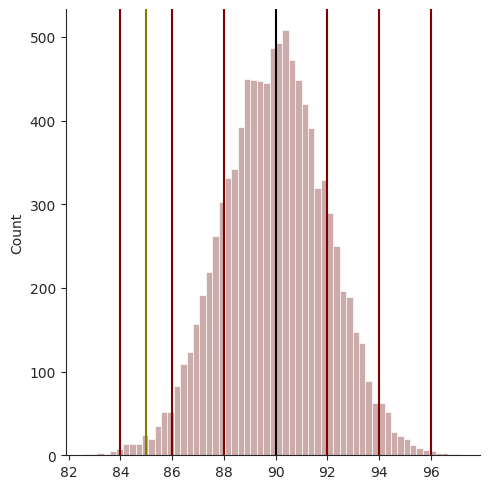

In [285]:
sns.displot(y, color='rosybrown')
plt.axvline(mu, color='black')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='maroon')
_ = plt.axvline(x_i, color='olive')

In [286]:
z = (x_i - mu)/sigma
z

-2.5

In [287]:
z = (x_i - np.mean(y))/np.std(y)
z

np.float64(-2.4845940057640497)

In [288]:
len(np.where(y > 85)[0])

9924

In [308]:
100*9924/10000

99.24

In [309]:
10000-9924

76

In [291]:
np.percentile(y, 1)


np.float64(85.30105808329131)

In [292]:
p_below = st.norm.cdf(-2.5)
p_below
#Calculates the probability that a value from the standard normal distribution is less than -2.5

np.float64(0.006209665325776132)

In [293]:
p_below*10000

np.float64(62.096653257761325)

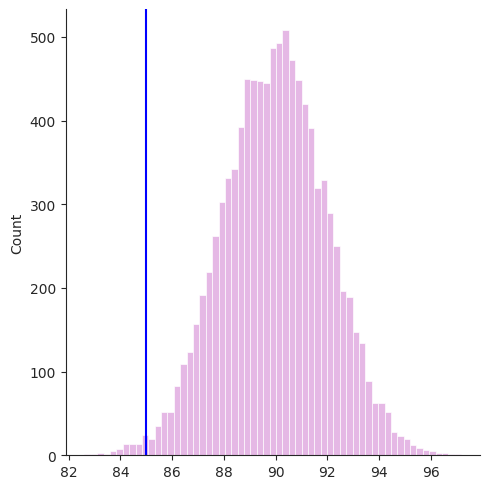

In [294]:
sns.displot(y, color='plum')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [295]:
st.norm.cdf(2.5)

np.float64(0.9937903346742238)

In [296]:
p_above = 1-st.norm.cdf(2.5)
p_above

np.float64(0.006209665325776159)

In [297]:
p_above*10000

np.float64(62.09665325776159)

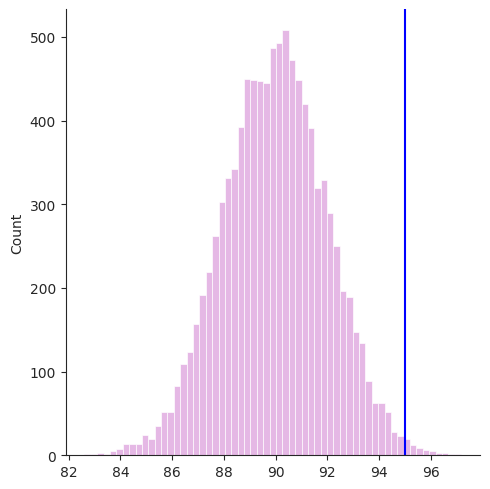

In [298]:
sns.displot(y, color='plum')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [299]:
p_outside = p_below + p_above
p_outside
#Calculates the total probability of being outside the range between two z-scores

np.float64(0.01241933065155229)

In [300]:
p_outside*10000

np.float64(124.1933065155229)

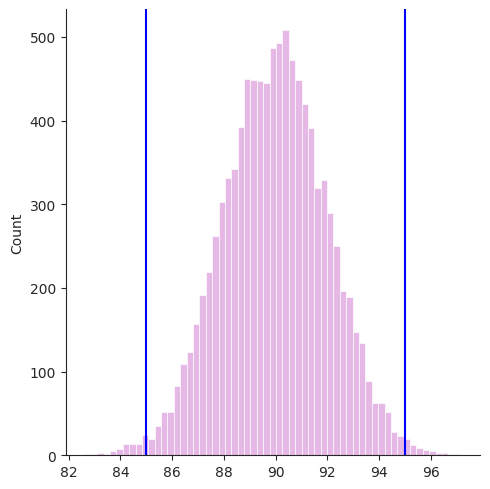

In [301]:
sns.displot(y, color='plum')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [302]:
st.norm.ppf(.025)

np.float64(-1.9599639845400545)

In [303]:
st.norm.ppf(.975)

np.float64(1.959963984540054)

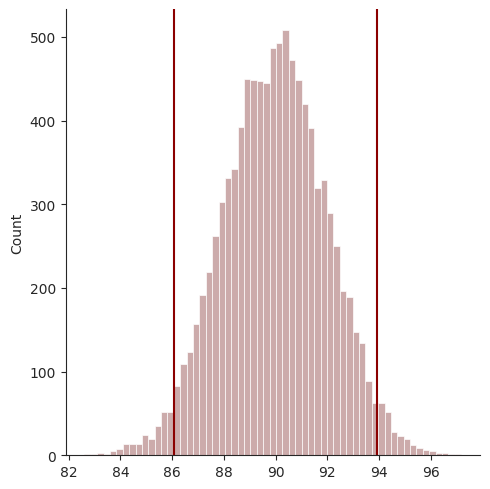

In [304]:
sns.displot(y, color='rosybrown')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

In [305]:
st.norm.ppf(.005)

np.float64(-2.575829303548901)

In [306]:
st.norm.ppf(.995)

np.float64(2.5758293035489004)

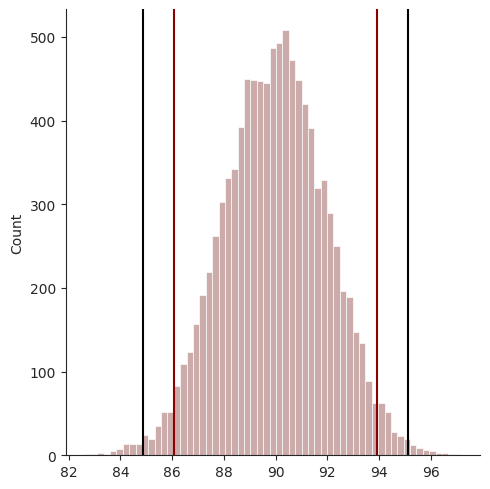

In [307]:
sns.displot(y, color='rosybrown')

plt.axvline(mu+1.96*sigma, color='darkred')
plt.axvline(mu-1.96*sigma, color='darkred')

plt.axvline(mu+2.56*sigma, color='black')
_ = plt.axvline(mu-2.56*sigma, color='black')